21:36:53 INFO    opendrift:576: OpenDriftSimulation initialised (version 1.14.6)
21:36:53 INFO    opendrift.models.basemodel.environment:203: Adding a global landmask from GSHHG
21:36:53 INFO    opendrift.models.basemodel.environment:227: Fallback values will be used for the following variables which have no readers: 
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	x_sea_water_velocity: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	y_sea_water_velocity: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_height: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_wave_significant_height: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	sea_ice_area_fraction: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	x_wind: 0.000000
21:36:53 INFO    opendrift.models.basemodel.environment:230: 	y_wind: 0.000000
21:36:53 INFO    opendrift.models.basemodel

--------------------
Reader performance:
--------------------
global_landmask
 0:00:01.2  total
 0:00:00.0  preparing
 0:00:01.2  reading
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml
 0:00:50.3  total
 0:00:00.0  preparing
 0:00:50.2  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.1  rotating vectors
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc
 0:00:43.1  total
 0:00:00.0  preparing
 0:00:43.0  reading
 0:00:00.6  interpolation
 0:00:00.0  interpolation_time
 0:00:00.1  rotating vectors
 0:00:00.0  masking
--------------------
Performance:
 1:51.2 total time
    0.0 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
 1:51.0 main loop
      1.6 updating elements
        1.5 vertical mixing
    0.0 cleaning up
--------------------
Model:	PhytoplanktonDrift     (OpenDrift 

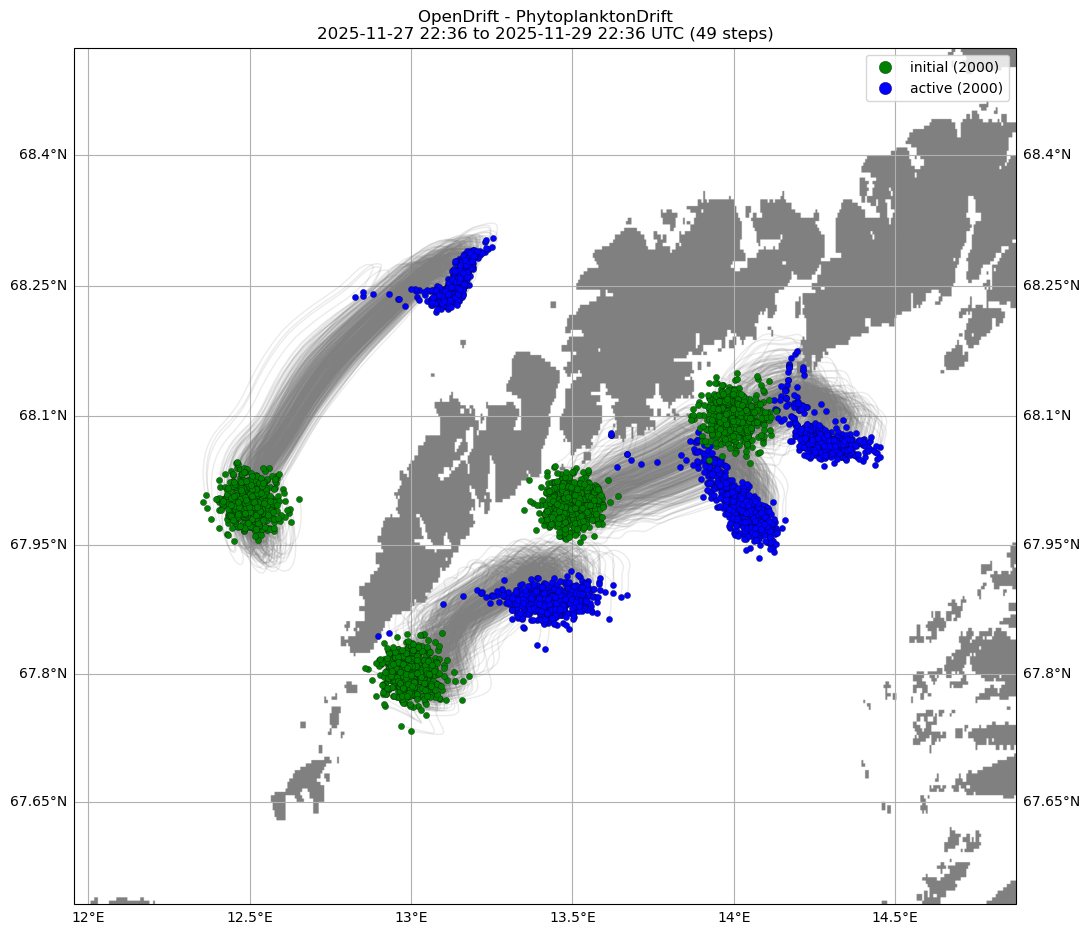

21:38:50 WARNING opendrift:2469: Plotting fast. This will make your plots less accurate.
21:38:51 INFO    opendrift:3107: Preparing animation for notebook....


21:39:25 INFO    opendrift:3080: Time to make animation: 0:00:34.917031
21:39:25 INFO    opendrift:3107: Preparing animation for notebook....


21:39:37 INFO    opendrift.models.oceandrift:643: Time to make animation: 0:00:11.784707


In [ ]:
"""
Cod egg
=============
"""

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.phyto import PhytoplanktonDrift
from datetime import datetime, timedelta

o = PhytoplanktonDrift(loglevel=20)  # Set loglevel to 0 for debug information

# Forcing with Topaz ocean model and MEPS atmospheric model
o.add_readers_from_list([
    'https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml',
    'https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc'])

#%%
# Adjusting some configuration
o.set_config('drift:vertical_mixing', True)
o.set_config('vertical_mixing:diffusivitymodel', 'windspeed_Sundby1983') # windspeed parameterization for eddy diffusivity
#%%
# Vertical mixing requires fast time step
o.set_config('vertical_mixing:timestep', 60.) # seconds

#%%
# spawn NEA cod eggs at defined position and time
time = datetime.now()
o.seed_elements(14. , 68.1, z=0, radius=2000, number=500,
                time=time, diameter=0.0014, density=1050)
o.seed_elements(12.5, 68., z=0, radius=2000, number=500,
                time=time, diameter=0.0014, density=1050)
o.seed_elements(13.5, 68., z=0, radius=2000, number=500,
                time=time, diameter=0.0014, density=1050)
o.seed_elements(13., 67.8, z=0, radius=2000, number=500,
                time=time, diameter=0.0014, density=1050)

#%%
# Running model
o.run(duration=timedelta(hours=48), time_step=3600)

#%%
# Print and plot results.
# At the end the wind vanishes, and eggs come to surface
print(o)

o.plot(fast=True)
o.animation(fast=True, color='z')

#%%
# .. image:: /gallery/animations/example_codegg_0.gif

#%% Vertical distribution of particles
o.animate_vertical_distribution()

#%%
# .. image:: /gallery/animations/example_codegg_1.gif
